In [22]:
from sample_psrs import load_psrs, fake_model_2a, fake_model_2a_no_tm
from model import PulsarLogLikelihood
from pta_fast_model import FastLogLikelihood

import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
psrs = load_psrs(1e-15, 1000)
pta0 = fake_model_2a(psrs)
pta1 = fake_model_2a_no_tm(psrs)

In [113]:
likelihood0 = PulsarLogLikelihood(psrs[0])
likelihood1 = FastLogLikelihood(pta1, psrs)

In [114]:
psrs[0].Mmat.shape

(5618, 120)

In [101]:
def diff(x):
    return pta0.get_lnlikelihood(x) - likelihood1(x)

In [123]:
diff([3, -15, -13])

-2.1077576093375683e-06

In [120]:
%%timeit
pta0.get_lnlikelihood([3, -15, -13])

640 µs ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [122]:
%%timeit
likelihood1([3, -15, -13])

142 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [60]:
2802 + 2803 - 8.85

5596.15

In [21]:
lnlike2 = FastLogLikelihood(psrs[0])

In [22]:
lnlike2([5, -15, -15])

72461.30785017279

In [6]:
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc
import matplotlib.pyplot as plt

In [48]:
# set up the sampler:
# initial jump covariance matrix
ndim = 3
cov = np.diag(np.ones(ndim) * 0.01**2)
outDir = './chains/true_data'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov, outDir=outDir)

In [49]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 0.10 percent in 0.974870 s Acceptance rate = 0.919/Users/aaron/opt/anaconda3/envs/enterprise/lib/python3.7/site-packages/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
Finished 1.00 percent in 8.977766 s Acceptance rate = 0.2822Adding DE jump with weight 50
Finished 99.90 percent in 864.093909 s Acceptance rate = 0.165791
Run Complete


In [2]:
with open('./chains/true_data/chain_1.txt', 'r') as f:
    data0 = np.loadtxt(f)

In [3]:
with open('./chains/new_data/chain_1.txt', 'r') as f:
    data1 = np.loadtxt(f)

In [4]:
burn = int(0.25 * data0.shape[0])
print(burn)

24975


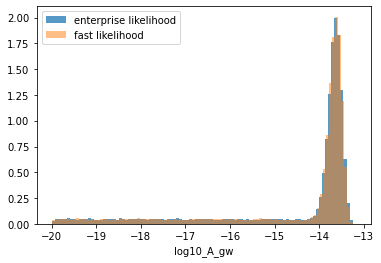

In [9]:
plt.hist(data0[burn:, 1], bins=100, density=True, alpha=0.75, label='enterprise likelihood')
plt.hist(data1[burn:, 1], bins=100, density=True, alpha=0.5, label='fast likelihood')
plt.xlabel('log10_A_gw')
plt.legend()
plt.savefig('test.png')
plt.show()

In [51]:
A = np.matmul(N_inv, M)
B = np.matmul(M.T, N_inv)
D_inv = N_inv - np.matmul(A, np.matmul(S_inv, B))

In [155]:
print(lnlike.norm_tmatrix)

[[ 0.01334164 -0.00607742 -0.01744352 ...  0.          0.
  -0.01498558]
 [ 0.01334164 -0.00607742 -0.01744352 ...  0.          0.
  -0.01498558]
 [ 0.01334164 -0.00607742 -0.01744352 ...  0.          0.
  -0.01498558]
 ...
 [ 0.01334164 -0.00633331 -0.01738768 ...  0.          0.24175482
   0.        ]
 [ 0.01334164 -0.00633331 -0.01738768 ...  0.          0.24519369
   0.        ]
 [ 0.01334164 -0.00633331 -0.01738768 ...  0.          0.24346461
   0.        ]]


In [188]:
left_factor = np.matmul(r.T, np.matmul(D_inv, F))
right_factor = np.matmul(F.T, np.matmul(D_inv, r))

In [121]:
cf = np.linalg.cholesky(sigma_new)
c = np.linalg.solve(cf, np.identity(60))
sigma_inv = np.dot(c.T, c)

In [123]:
print(sigma_inv.shape)

(60, 60)
